In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.optimizers import adam_v2
from ast import Return
from scipy import optimize


In [ ]:
from google.colab import files 
files.upload()

Saving gas_turbines.csv to gas_turbines.csv


{'gas_turbines.csv': b'AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX\r\n6.8594,1007.9,96.799,3.5,19.663,1059.2,550,114.7,10.605,3.1547,82.722\r\n6.785,1008.4,97.118,3.4998,19.728,1059.3,550,114.72,10.598,3.2363,82.776\r\n6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468\r\n7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.67\r\n7.3978,1009.7,95.15,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311\r\n7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409\r\n7.7901,1011.6,91.983,3.5298,19.659,1060,549.87,114.71,10.644,3.4874,82.44\r\n7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.01\r\n7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284\r\n8.082,1015,88.597,4.0612,23.406,1083,550.21,131.7,11.679,1.9081,82.782\r\n8.3047,1016,86.343,4.087,23.747,1085.3,550.2,133.67,11.703,1.7118,81.995\r\n8.4684,1016.1,86.491,4.0513,23.734,1085.1,550.14,134.24,11.775,1.4672,80.638\r\

In [ ]:
df=pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [ ]:
df.shape

(15039, 11)

In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [ ]:
feature=df.describe().columns

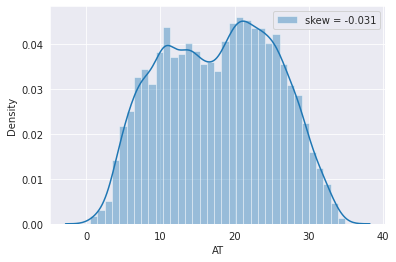

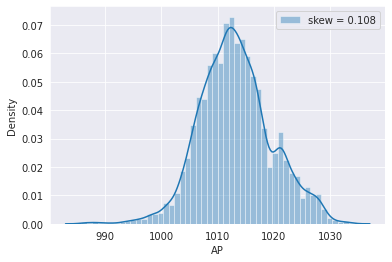

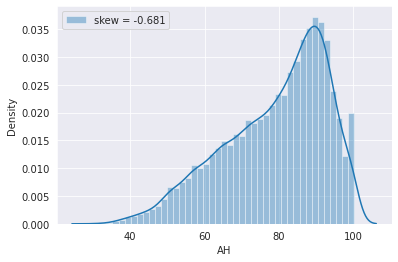

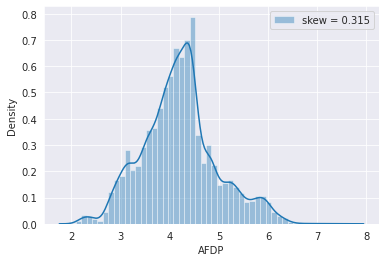

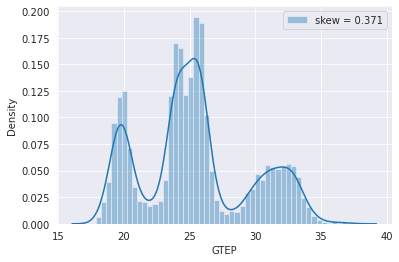

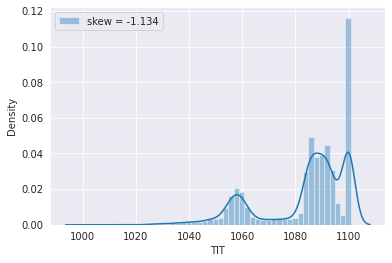

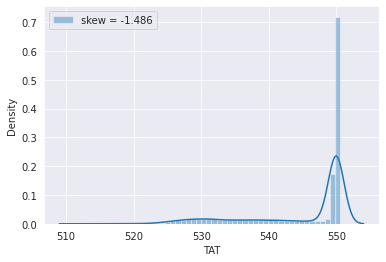

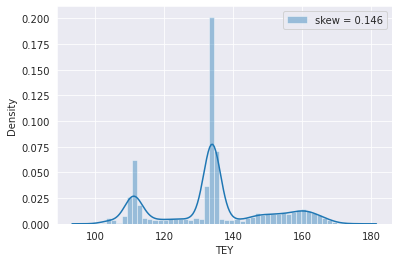

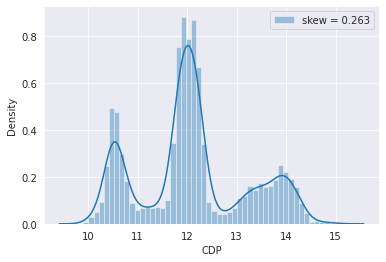

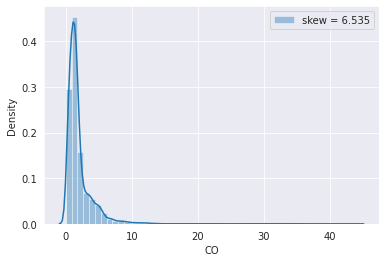

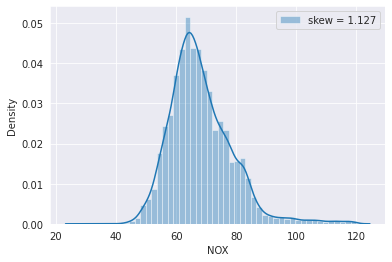

In [ ]:
for i in feature:
  skew=df[i].skew()
  sns.distplot(df[i],label="skew = %.3f" %(skew))
  plt.legend(loc="best")
  plt.show()

In [ ]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

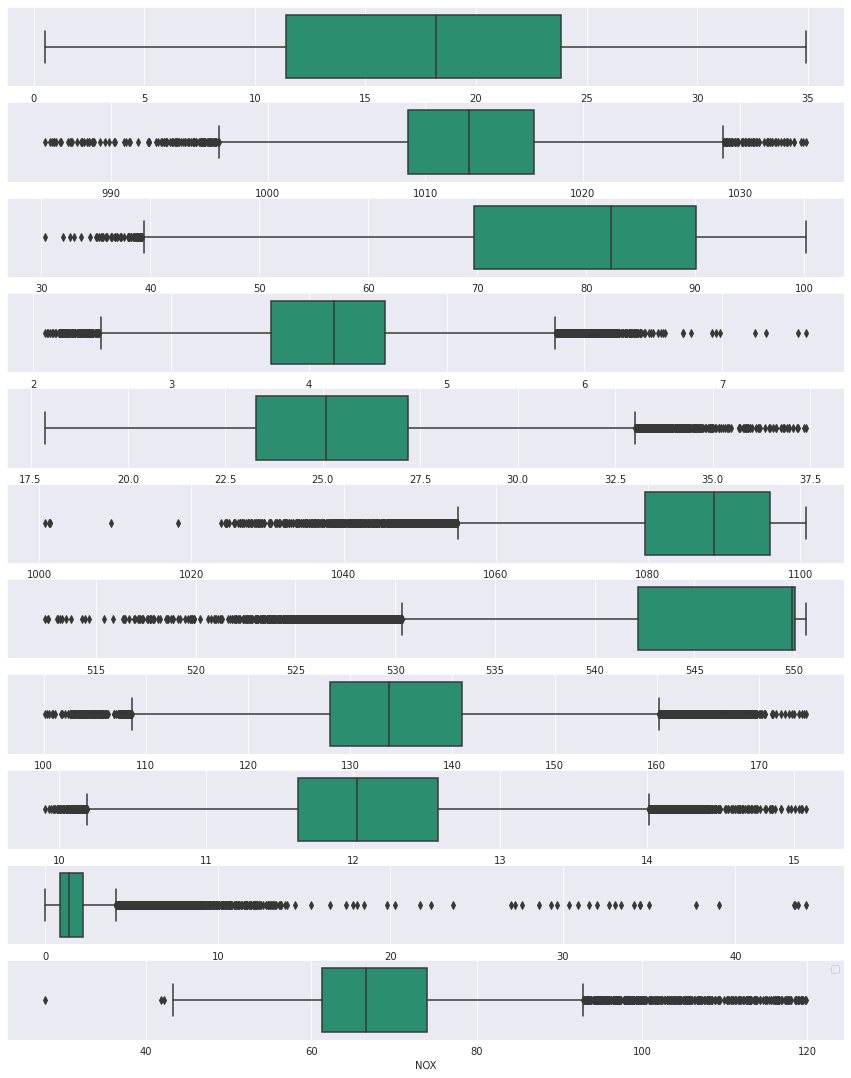

In [ ]:
data=df.copy()
fig, axes= plt.subplots(11,1,figsize=(15,19),sharex=False,sharey=False)
sns.boxplot(x="AT",data=data,palette="Dark2",ax=axes[0])
sns.boxplot(x="AP",data=data,palette="Dark2",ax=axes[1])
sns.boxplot(x="AH",data=data,palette="Dark2",ax=axes[2])
sns.boxplot(x="AFDP",data=data,palette="Dark2",ax=axes[3])
sns.boxplot(x="GTEP",data=data,palette="Dark2",ax=axes[4])
sns.boxplot(x="TIT",data=data,palette="Dark2",ax=axes[5])
sns.boxplot(x="TAT",data=data,palette="Dark2",ax=axes[6])
sns.boxplot(x="TEY",data=data,palette="Dark2",ax=axes[7])
sns.boxplot(x="CDP",data=data,palette="Dark2",ax=axes[8])
sns.boxplot(x="CO",data=data,palette="Dark2",ax=axes[9])
sns.boxplot(x="NOX",data=data,palette="Dark2",ax=axes[10])

plt.legend()
plt.show()

<Figure size 1440x1440 with 0 Axes>

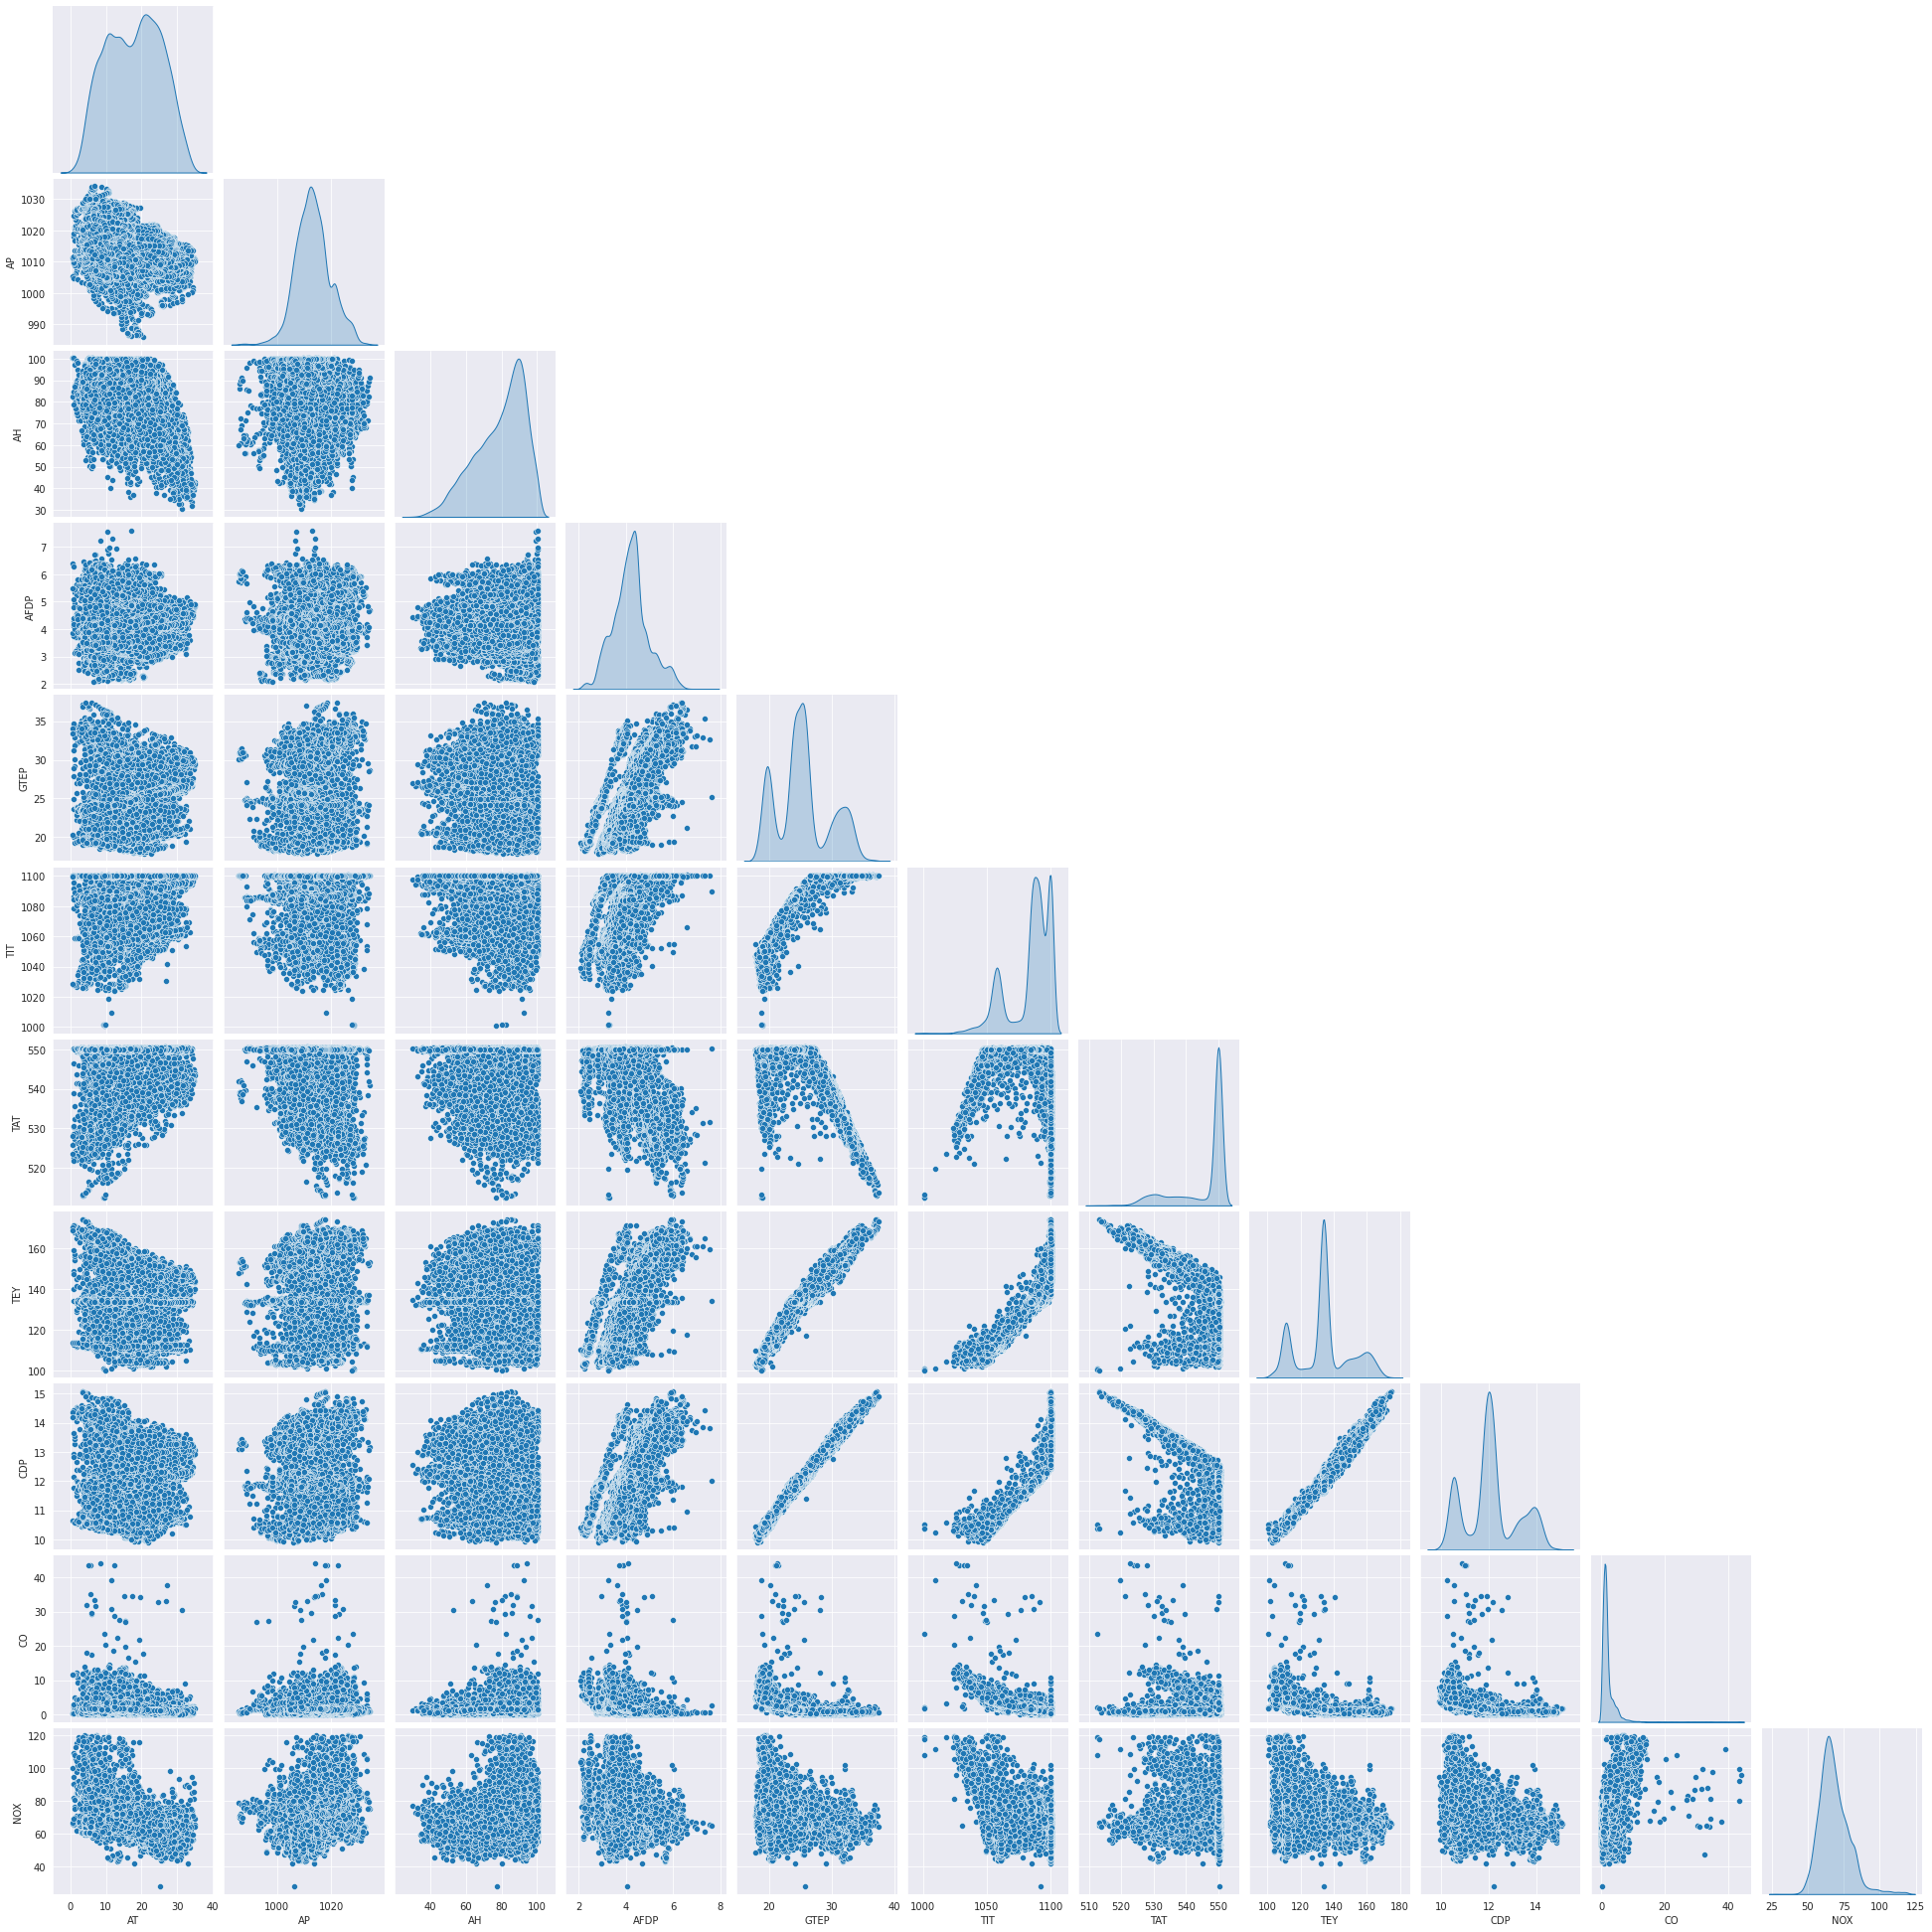

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(data,kind="scatter",diag_kind="kde",
             corner=True)

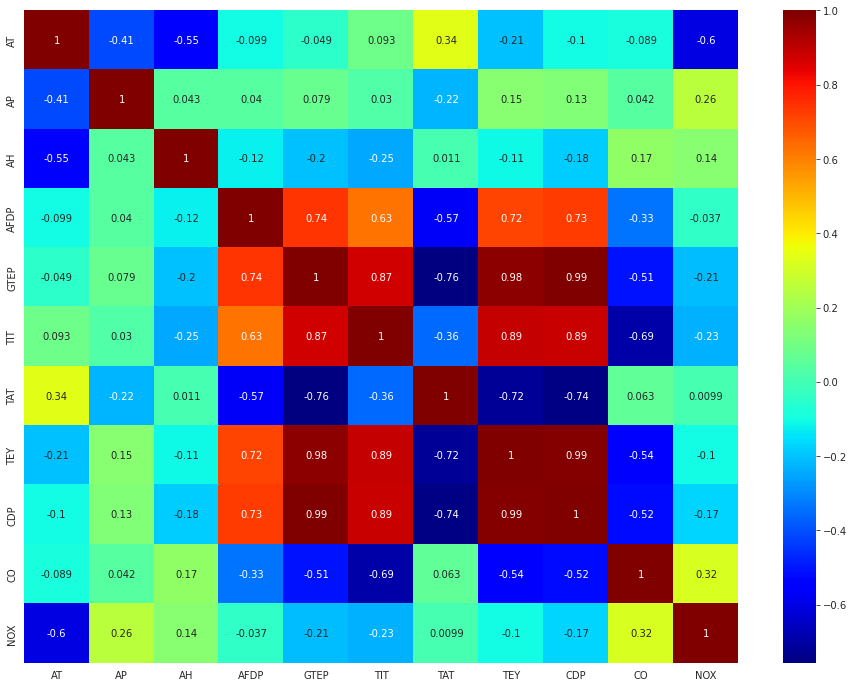

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),cmap="jet",annot=True)

In [ ]:
scale=StandardScaler()
df_standard=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df_standard.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591


In [ ]:
x=df_standard.drop("TEY",axis=1)
y=df_standard[["TEY"]]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

Tuning of Hyperparameter : Batch Size and Epochs

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=x_train.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
    
    adam = adam_v2.Adam(lr=0.01)
    
    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['accuracy'])
    
    return model

In [ ]:
# Create the model
model = KerasRegressor(build_fn = create_model, verbose = 0)

# Define the grid search parameters
batch_size = [30, 20, 40]
epochs = [10, 50, 100, 150]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,
                  epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=30, epochs=10...................................
[CV 1/5; 1/12] END ...batch_size=30, epochs=10;, score=-0.002 total time=  11.1s
[CV 2/5; 1/12] START batch_size=30, epochs=10...................................
[CV 2/5; 1/12] END ...batch_size=30, epochs=10;, score=-0.002 total time=   5.9s
[CV 3/5; 1/12] START batch_size=30, epochs=10...................................
[CV 3/5; 1/12] END ...batch_size=30, epochs=10;, score=-0.002 total time=   4.9s
[CV 4/5; 1/12] START batch_size=30, epochs=10...................................
[CV 4/5; 1/12] END ...batch_size=30, epochs=10;, score=-0.002 total time=  14.6s
[CV 5/5; 1/12] START batch_size=30, epochs=10...................................
[CV 5/5; 1/12] END ...batch_size=30, epochs=10;, score=-0.002 total time=  11.0s
[CV 1/5; 2/12] START batch_size=30, epochs=50...................................
[CV 1/5; 2/12] END ...batch_size=30, epochs=50;,

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_, 
                                   grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0014293508604168892, using {'batch_size': 30, 'epochs': 150}
-0.0021588715026155114,0.00032053448618397137 with: {'batch_size': 30, 'epochs': 10}
-0.0015820407308638096,0.00013632511477233895 with: {'batch_size': 30, 'epochs': 50}
-0.0016752040479332208,0.00033213342200432957 with: {'batch_size': 30, 'epochs': 100}
-0.0014293508604168892,0.00020463465075914935 with: {'batch_size': 30, 'epochs': 150}
-0.002912881434895098,0.001934445138549627 with: {'batch_size': 20, 'epochs': 10}
-0.002767312480136752,0.0011855559751234189 with: {'batch_size': 20, 'epochs': 50}
-0.0025239488342776893,0.0014358457065128483 with: {'batch_size': 20, 'epochs': 100}
-0.0019056667108088732,0.0004477118291928616 with: {'batch_size': 20, 'epochs': 150}
-0.0023966113105416296,0.0014993665023607706 with: {'batch_size': 40, 'epochs': 10}
-0.0017420916352421044,0.0003211953296245911 with: {'batch_size': 40, 'epochs': 50}
-0.0017212061444297432,0.00013900668642974004 with: {'batch_size': 40, 'epochs': 100

Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
# Defining the model

def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = x_train.shape[1],kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = learning_rate)

    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['accuracy'])
    
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,
                        verbose = 0,
                        batch_size = 30,
                        epochs = 150)

# Define the grid search parameters

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,
                   dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.001 total time= 1.4min
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.001 total time= 1.2min
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.001 total time= 1.1min
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.001 total time= 1.2min
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.001 total time= 1.1min
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.001126745215151459, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.001126745215151459,0.00018361187136542884 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.0015968985389918089,0.000315906668603516 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.2179416261613369,0.41843002373307614 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.006268699979409575,0.0023017815588886044 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.011534675396978855,0.004666546477773115 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.8403403043746949,0.35738568801114456 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.006773588340729475,0.0025795957620544903 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.015309018455445767,0.006290050132355878 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-1.0203270196914673,0.0449908643496502 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function, init):
    model = Sequential()
    model.add(Dense(32,input_dim = x_train.shape[1],kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0))
    model.add(Dense(64,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0))
    model.add(Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,
                        verbose = 0,
                        batch_size = 30,
                        epochs = 150)

# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear','LeakyRelu']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/15] END activation_function=softmax, init=uniform;, score=-0.001 total time= 1.2min
[CV 2/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/15] END activation_function=softmax, init=uniform;, score=-0.001 total time= 1.2min
[CV 3/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/15] END activation_function=softmax, init=uniform;, score=-0.001 total time= 1.3min
[CV 4/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/15] END activation_function=softmax, init=uniform;, score=-0.001 total time= 1.2min
[CV 5/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/15] END activation_function=softmax, init=uniform;, score=-0.001 total time= 1.4min
[CV 1/5; 2/15] START activation_function=softmax, init=norm

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0010858926107175648, using {'activation_function': 'relu', 'init': 'normal'}
-0.0013821921311318874,8.834702477299098e-05 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.0013717043912038207,5.9892538598666645e-05 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.0028384430799633263,0.0002906508660989856 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.0011233713943511249,9.969392234533155e-05 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.0010858926107175648,0.00011080391216333399 with: {'activation_function': 'relu', 'init': 'normal'}
-1.0073197722434997,0.03281895800804325 with: {'activation_function': 'relu', 'init': 'zero'}
-0.002024858258664608,0.0003707591622587938 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.0018434604862704873,0.00013637970682908124 with: {'activation_function': 'tanh', 'init': 'normal'}
-1.0073307156562805,0.0326940688601132 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.0022

Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = x_train.shape[1],kernel_initializer = 'normal',
                    activation = 'relu'))
    model.add(Dropout(0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0))
    model.add(Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,
                        verbose = 0,
                        batch_size = 30,
                        epochs = 150)

# Define the grid search parameters

neuron1 = [24,32,64]
neuron2 = [32,48,64]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,
                   neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=24, neuron2=32......................................
[CV 1/5; 1/9] END ......neuron1=24, neuron2=32;, score=-0.001 total time= 1.7min
[CV 2/5; 1/9] START neuron1=24, neuron2=32......................................
[CV 2/5; 1/9] END ......neuron1=24, neuron2=32;, score=-0.001 total time= 1.3min
[CV 3/5; 1/9] START neuron1=24, neuron2=32......................................
[CV 3/5; 1/9] END ......neuron1=24, neuron2=32;, score=-0.001 total time= 1.4min
[CV 4/5; 1/9] START neuron1=24, neuron2=32......................................
[CV 4/5; 1/9] END ......neuron1=24, neuron2=32;, score=-0.001 total time= 1.2min
[CV 5/5; 1/9] START neuron1=24, neuron2=32......................................
[CV 5/5; 1/9] END ......neuron1=24, neuron2=32;, score=-0.001 total time= 1.4min
[CV 1/5; 2/9] START neuron1=24, neuron2=48......................................
[CV 1/5; 2/9] END ......neuron1=24, neuron2=48;, 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0010077088954858482, using {'neuron1': 64, 'neuron2': 32}
-0.0012087867129594088,6.50460587574464e-05 with: {'neuron1': 24, 'neuron2': 32}
-0.0012037178734317423,0.00010308653725971897 with: {'neuron1': 24, 'neuron2': 48}
-0.0011637184070423245,0.0001452272565487306 with: {'neuron1': 24, 'neuron2': 64}
-0.0012130123097449542,0.00017727928641054954 with: {'neuron1': 32, 'neuron2': 32}
-0.0011127421050332487,0.0001266984988678887 with: {'neuron1': 32, 'neuron2': 48}
-0.001096005318686366,6.89637544940309e-05 with: {'neuron1': 32, 'neuron2': 64}
-0.0010077088954858482,6.219047165475772e-05 with: {'neuron1': 64, 'neuron2': 32}
-0.0011266008368693292,0.0001932829508483018 with: {'neuron1': 64, 'neuron2': 48}
-0.0010495732654817401,0.00012618780538135174 with: {'neuron1': 64, 'neuron2': 64}


Training model with optimum values of Hyperparameters

In [ ]:
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(64,input_dim = x_train.shape[1],kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0))
    model.add(Dense(32,input_dim = 64,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0))
    model.add(Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = 0.001) 
    
    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,
                        verbose = 0,
                        batch_size = 30,
                        epochs = 150)

# Fitting the model

model.fit(x_train,y_train)



In [ ]:
# Predicting using trained model

y_predict = model.predict(x_test)


In [ ]:
# Printing the metrics
mean_squared_error(y_test, y_predict)

0.0012874555175740716

Hyperparameters all at once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = x_train.shape[1],kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = learning_rate)
    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
batch_size = [30, 20, 40]
epochs = [10, 50, 100, 150]
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]
activation_function = ['softmax','relu','tanh','linear','LeakyRelu']
init = ['uniform','normal','zero']
neuron1 = [24,32,64]
neuron2 = [32,48,64]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,
                   epochs = epochs,
                   learning_rate = learning_rate,
                   dropout_rate = dropout_rate,
                   activation_function = activation_function,
                   init = init,
                   neuron1 = neuron1,
                   neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_train,y_train)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))